# Heart Disease Prediction Using ANN

In [2]:
import pandas as pd
df=pd.read_csv(r"C:\Users\shubh\Downloads\archive (3)\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
x=df.columns[df.dtypes=='object']
for c in x:
    df[c]=df[c].factorize()[0]

In [7]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


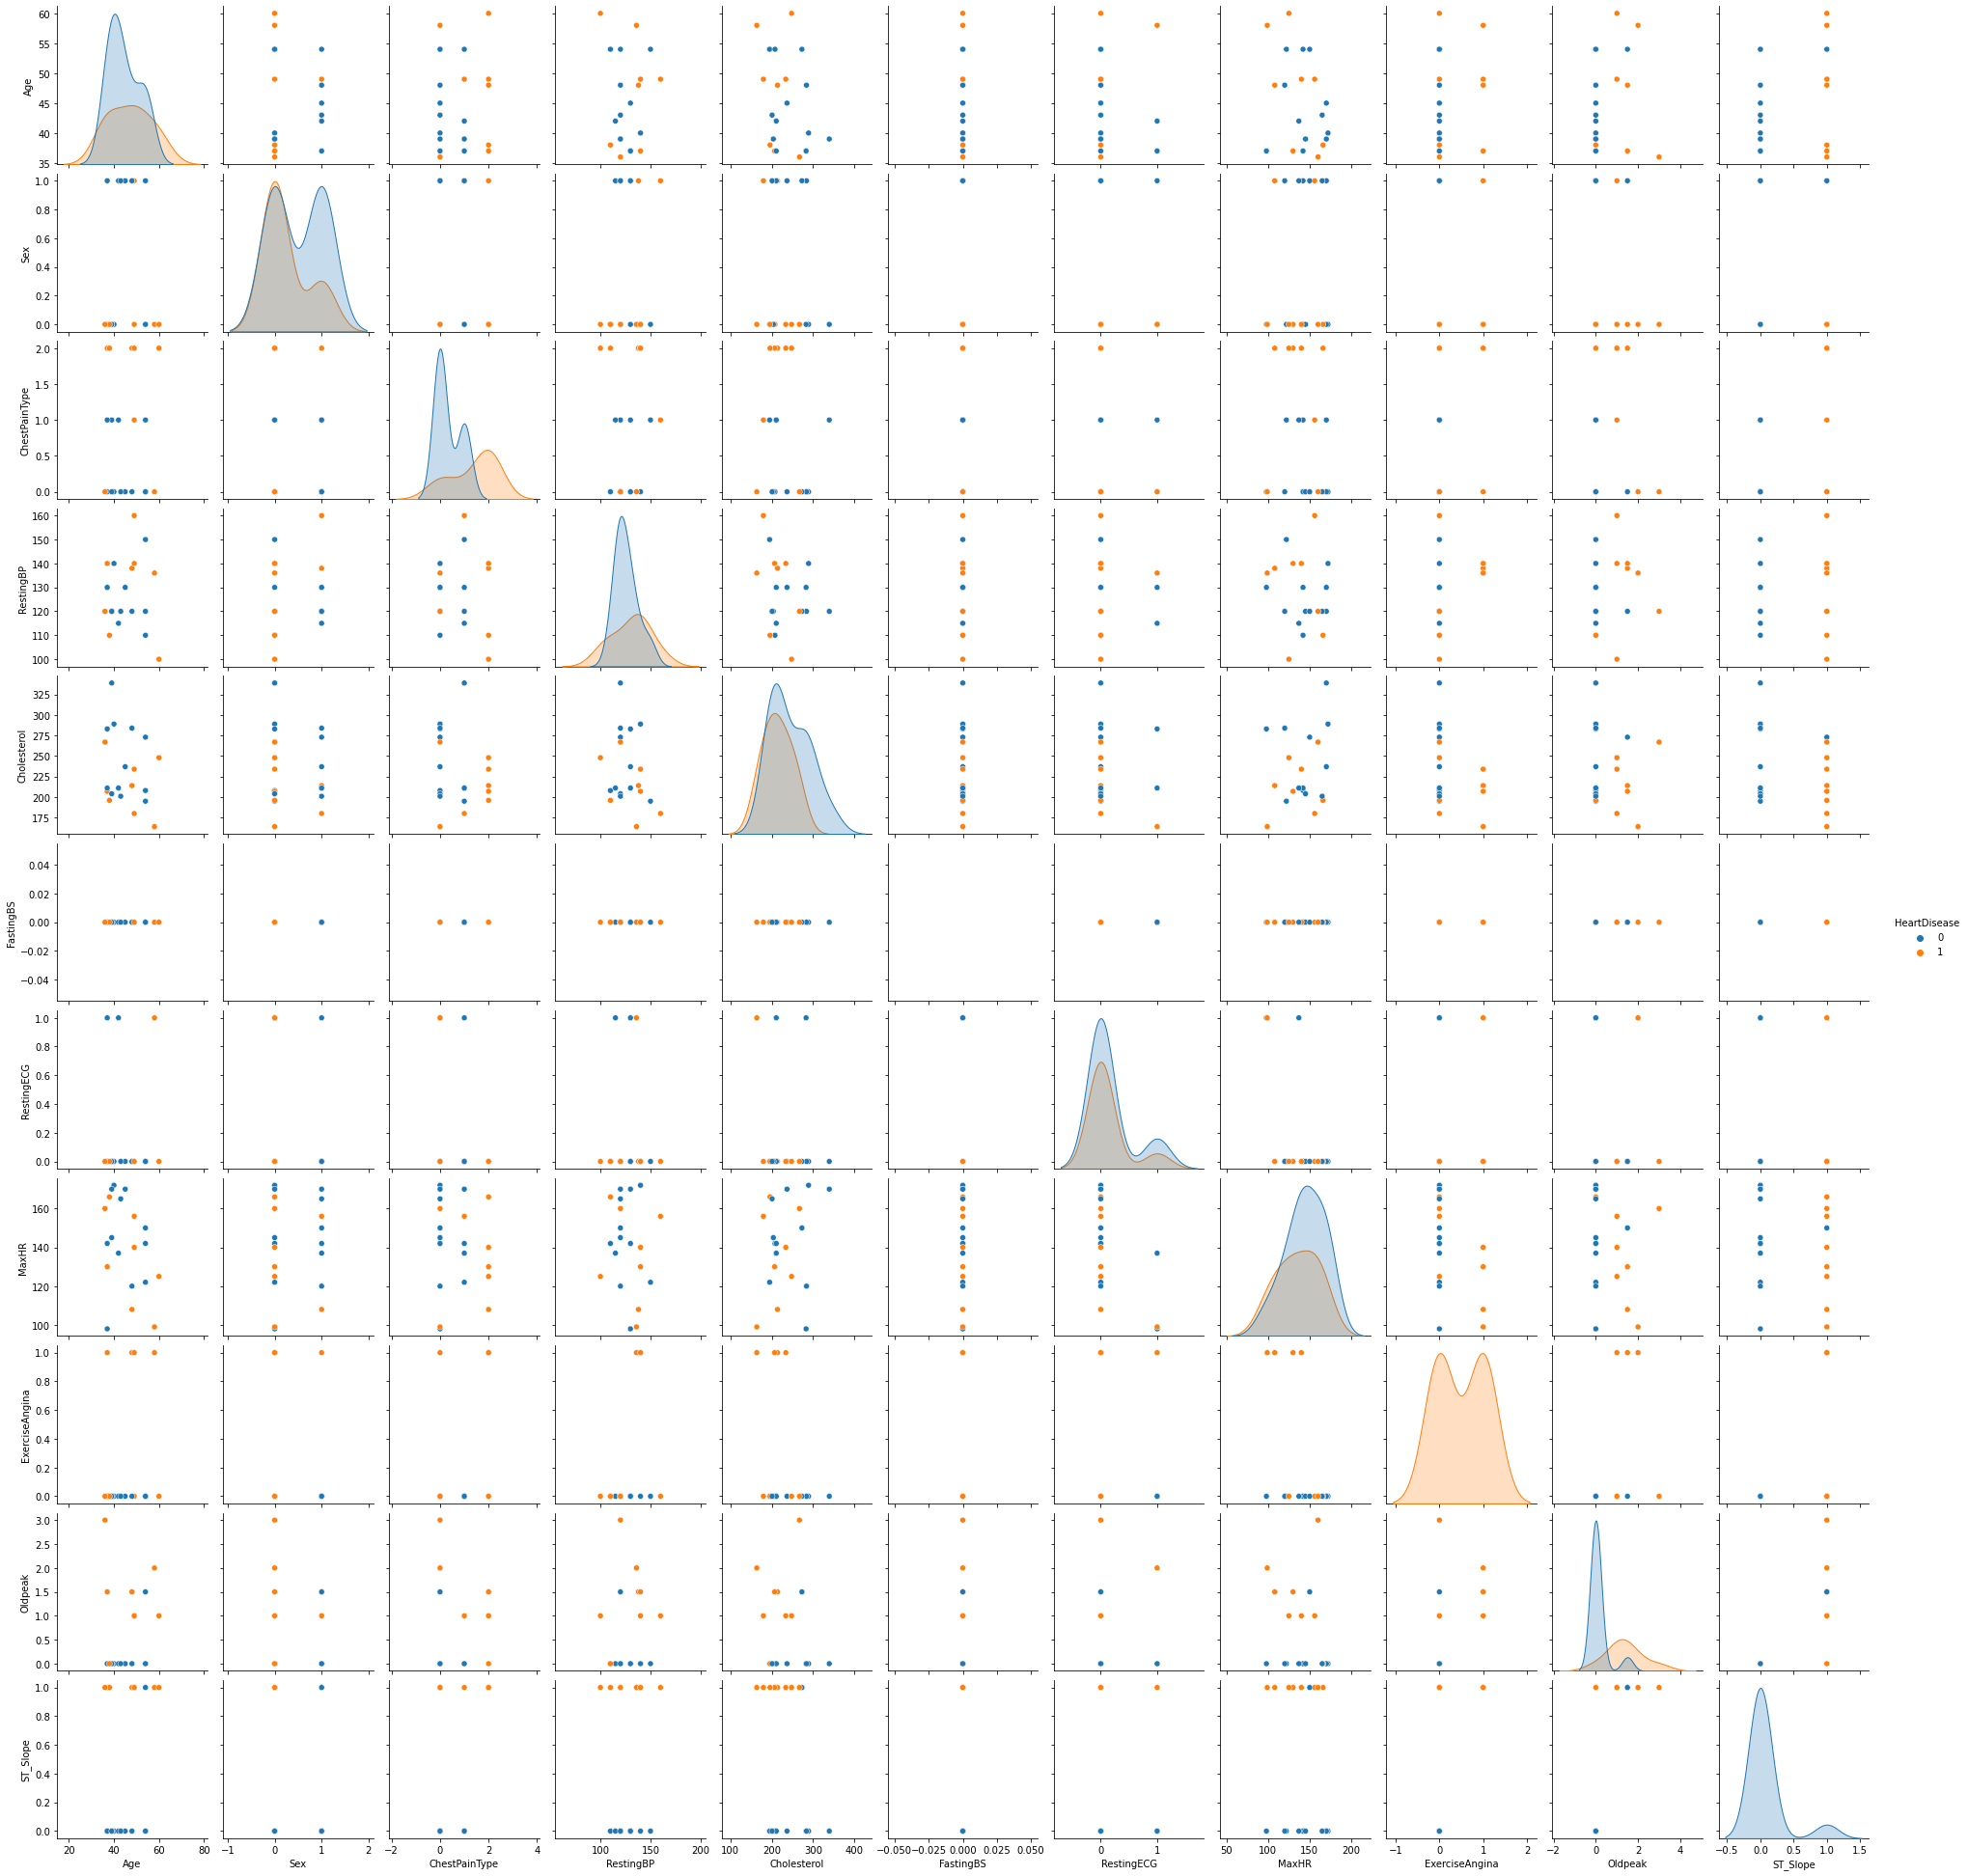

In [9]:
import seaborn as sns
df1=df[:20]
sns.pairplot(df1,hue="HeartDisease")

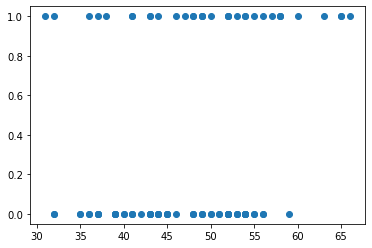

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df1=df[:100]
plt.scatter(df1['Age'],df1['HeartDisease'])

In [11]:
X=df.drop('HeartDisease',axis=1).values
y=df['HeartDisease'].values   #numpy arrays

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
#Pytorch Libraries
import torch
import torch.nn as nn  #Module for neural networks  
import torch.nn.functional as F  #Module for neural network operations like ReLu

In [14]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [15]:
X_train.dtype

torch.float32

## Creating an ANN model class for Instantiation and ReLu for activation function for each      Fully Connected Layer

In [16]:
#ANN model best for tabular data, text data instead of Image Data; CNN best for images
class ANN_Model(nn.Module):
    def __init__(self,input_features=11,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [17]:
model=ANN_Model()  #instantiate ANN model
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [18]:
#Backpropagation
#Loss Function- Cross Entropy Loss 
#Optimizer- Adam
#Learning Rate for gradient descent t monimize loss fxn - 0.01
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [64]:
epochs=500
losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    losses.append(loss)
    print("Loss for epoch number: ",i," is ",loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Loss for epoch number:  1  is  0.2696278393268585
Loss for epoch number:  2  is  0.2693842053413391
Loss for epoch number:  3  is  0.2699437439441681
Loss for epoch number:  4  is  0.2693192958831787
Loss for epoch number:  5  is  0.26961445808410645
Loss for epoch number:  6  is  0.26970142126083374
Loss for epoch number:  7  is  0.2696300446987152
Loss for epoch number:  8  is  0.26945003867149353
Loss for epoch number:  9  is  0.26975584030151367
Loss for epoch number:  10  is  0.2697407603263855
Loss for epoch number:  11  is  0.270092636346817
Loss for epoch number:  12  is  0.27048200368881226
Loss for epoch number:  13  is  0.2709137201309204
Loss for epoch number:  14  is  0.2715666890144348
Loss for epoch number:  15  is  0.27188584208488464
Loss for epoch number:  16  is  0.27270445227622986
Loss for epoch number:  17  is  0.27375078201293945
Loss for epoch number:  18  is  0.27501729130744934
Loss for epoch number:  19  is  0.2773644030094147
Loss for epoch number:  20  is  

In [65]:
loss_list=[]
epoch_range=[]
i=0
for x in losses:
    i=i+1
    if(i%5==0):
        epoch_range.append(i)
        loss_list.append(x.item())

In [62]:
print(len(loss_list))
loss_list

100


[0.3065878748893738,
 0.2893346846103668,
 0.27811700105667114,
 0.277249813079834,
 0.27783000469207764,
 0.2767208516597748,
 0.2769012451171875,
 0.2762455344200134,
 0.27716803550720215,
 0.2760109007358551,
 0.27671754360198975,
 0.2759614586830139,
 0.27705374360084534,
 0.275736927986145,
 0.277361661195755,
 0.27621257305145264,
 0.27534231543540955,
 0.27633190155029297,
 0.2757222056388855,
 0.27588891983032227,
 0.2750847339630127,
 0.27493393421173096,
 0.27719852328300476,
 0.2866964042186737,
 0.32364532351493835,
 0.2812778055667877,
 0.2782630920410156,
 0.2796330749988556,
 0.2776792347431183,
 0.2775149941444397,
 0.2768516540527344,
 0.27558910846710205,
 0.27650687098503113,
 0.27480146288871765,
 0.27466368675231934,
 0.2739020884037018,
 0.2751403748989105,
 0.27400490641593933,
 0.2756466865539551,
 0.2749358117580414,
 0.2742900848388672,
 0.27341148257255554,
 0.27309510111808777,
 0.2731568217277527,
 0.27284830808639526,
 0.27258166670799255,
 0.2728250622749

Text(0, 0.5, 'Loss')

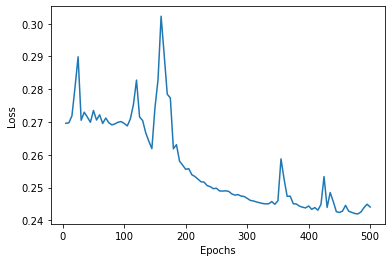

In [66]:
plt.plot(epoch_range,loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [67]:
losses[:5]

[tensor(0.2696, grad_fn=<NllLossBackward0>),
 tensor(0.2694, grad_fn=<NllLossBackward0>),
 tensor(0.2699, grad_fn=<NllLossBackward0>),
 tensor(0.2693, grad_fn=<NllLossBackward0>),
 tensor(0.2696, grad_fn=<NllLossBackward0>)]

## Testing Data 

In [71]:
for i,data in enumerate(X_test):
    print(i)
    print(data)



0
tensor([5.5000e+01, 0.0000e+00, 2.0000e+00, 1.1500e+02, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.5500e+02, 0.0000e+00, 1.0000e-01, 1.0000e+00])
1
tensor([ 66.0000,   0.0000,   2.0000, 120.0000, 302.0000,   0.0000,   2.0000,
        151.0000,   0.0000,   0.4000,   1.0000])
2
tensor([ 51.,   0.,   2., 110.,   0.,   1.,   0.,  92.,   0.,   0.,   1.])
3
tensor([ 55.0000,   0.0000,   1.0000, 120.0000,   0.0000,   0.0000,   1.0000,
        125.0000,   1.0000,   2.5000,   1.0000])
4
tensor([ 62.,   0.,   0., 140., 271.,   0.,   0., 152.,   0.,   1.,   0.])
5
tensor([ 37.,   0.,   2., 130., 315.,   0.,   0., 158.,   0.,   0.,   0.])
6
tensor([ 55.0000,   1.0000,   0.0000, 132.0000, 342.0000,   0.0000,   0.0000,
        166.0000,   0.0000,   1.2000,   0.0000])
7
tensor([ 42.,   1.,   1., 115., 211.,   0.,   1., 137.,   0.,   0.,   0.])
8
tensor([ 42.,   0.,   1., 160., 147.,   0.,   0., 146.,   0.,   0.,   0.])
9
tensor([ 56.,   0.,   1., 130., 167.,   0.,   0., 114.,   0.,   0.,   0.])


In [75]:
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        print(y_pred)  #Gives two output features: predictions for every testing data tensor.
        print(y_pred.argmax())
        print(y_pred.argmax().item())  #Gives ouptut as 0 or 1: return index of largest element in tensor thus, returns 1 if index 1 has larger value, which means output node is 1. Patient has heart disease.
        

tensor([-14.5776,   8.6046])
1
tensor(1)
tensor([-5.5696, -4.9673])
1
tensor(1)
tensor([-38.5175,  17.4299])
1
tensor(1)
tensor([-3.8525, -2.7419])
1
tensor(1)
tensor([-0.8362, -4.4850])
0
tensor(0)
tensor([-2.8472, -4.1571])
0
tensor(0)
tensor([ 4.8998, -7.3594])
0
tensor(0)
tensor([ 1.0114, -4.6330])
0
tensor(0)
tensor([ 0.2793, -4.0561])
0
tensor(0)
tensor([-0.2415, -3.9559])
0
tensor(0)
tensor([-4.0607, -2.9244])
1
tensor(1)
tensor([-4.9963, -3.2597])
1
tensor(1)
tensor([-41.8718,  19.6156])
1
tensor(1)
tensor([-7.4141, -3.9397])
1
tensor(1)
tensor([-2.3310, -3.7600])
0
tensor(0)
tensor([-21.2625,   8.1237])
1
tensor(1)
tensor([-8.2430, -6.1372])
1
tensor(1)
tensor([-44.4840,  21.0313])
1
tensor(1)
tensor([-7.4192, -5.2031])
1
tensor(1)
tensor([-1.6257, -2.9254])
0
tensor(0)
tensor([-7.5114, -4.4274])
1
tensor(1)
tensor([-7.5171, -4.1775])
1
tensor(1)
tensor([-1.6395, -0.8600])
1
tensor(1)
tensor([-4.5218, -3.0859])
1
tensor(1)
tensor([ 1.5526, -4.6691])
0
tensor(0)
tensor([ 1.4115

In [72]:
predictions=[]
#Remove grad item from the tensor as shown above
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())
    

1
1
1
1
0
0
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
1
0
1
0
0
1
1
0
1
0
0
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
0
0
1
0
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
0
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
1
1
0
0
1
0
0
1


In [81]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
print("The accuracy of model is ",accuracy*100,"%")

The accuracy of model is  83.15217391304348 %


In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[59, 18],
       [13, 94]], dtype=int64)

Text(87.0, 0.5, 'Predicted Values')

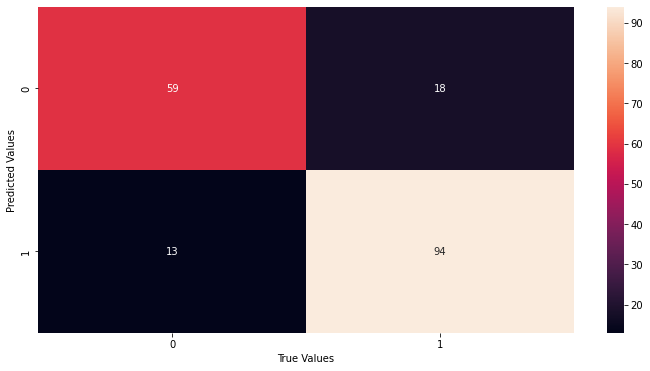

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [86]:
torch.save(model,'Heart_disease.pt')

In [87]:
model=torch.load('Heart_disease.pt')

In [88]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [89]:
data_to_predict=torch.tensor([38.,   0.,   1., 127., 189.,   1.,   0., 182.,   0.,   1.,   0.])

In [90]:
with torch.no_grad():
    print(model(data_to_predict))
    print(model(data_to_predict).argmax().item())

tensor([ 0.7706, -2.5885])
0
